In [1]:
from parameters import *
from functions import *
from parameters import *
from functions import *
from PDE_solutions import *

walks = 10000
dt =T/200
m = 9

In [2]:
def StageWalk(X0, R_in, R_f, T_in, dt):
    finalT = T_in
    r = np.sqrt( X0[0]**2 + X0[1]**2 )
    
    while(r > R_f and finalT < T):
        X0 = X0 + u(X0) * dt + sigma * np.sqrt(dt)* norm.rvs(size=2)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
    
    return X0, finalT

def StageWalk_Plot(X0, R_in, R_f, T_in, dt):
    finalT = T_in
    r = np.sqrt( X0[0]**2 + X0[1]**2 )
    X = [X0]
    while(r > R_f and finalT < T):
        X0 = X0 + u(X0) * dt + sigma * np.sqrt(dt)* norm.rvs(size=2)
        X.append(X0)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
    
    return np.asarray(X), finalT


def f(X0, T0, H, n, R, stage):
    #recursive function, I don't know how to properly comment this
    
    # H is an array that contains the number of hits, in the reference is what they call R.
    
    count = 0
    
    if stage != n.shape[0]-1:
        while(count < n[stage]):
            X, finalT = StageWalk(X0, R[stage], R[stage+1], T0, dt)
            if(finalT < T):
                H[stage] = H[stage] + 1
                H = f(X, finalT, H, n, R, stage + 1)
            count = count + 1
    else:
        while(count < n[stage]):
            X, finalT = StageWalk(X0, R[stage], R[stage+1], T0, dt)
            if(finalT < T):
                H[stage] = H[stage] + 1
                #don't call the function again, we are in the final layer
            count = count + 1
    return H


In [3]:
np.random.seed(SEED) #scipy is based on the numpy seed

R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R
R_list = np.linspace(R_in,R_f,m)

n = np.ones(R_list.shape[0]-1) * (m-1)
H = np.zeros(R_list.shape[0]-1) #hits

print(R_list)
print(n)
print(n.prod())

[3.   2.75 2.5  2.25 2.   1.75 1.5  1.25 1.  ]
[8. 8. 8. 8. 8. 8. 8. 8.]
16777216.0


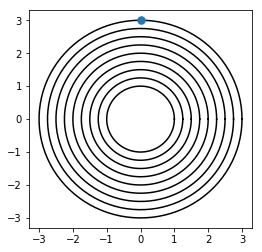

In [4]:
plt.figure(figsize=[4,4])
for radius in R_list:
    theta = np.linspace(0,2*np.pi,100)
    plt.plot(radius*np.cos(theta),radius*np.sin(theta),'k-')

plt.plot(X0[0],X0[1],'.', ms = 15)

In [5]:
H = f(X0, 0, H, n, R_list, 0)

In [6]:
#compute the probability
NUM = H[-1]
DEN = n.prod()
NUM/DEN

4.9233436584472656e-05